# Text and Sentiment Analysis of DBS Bank Ltd. Banking Performance Using Part-of-Speech Tagging

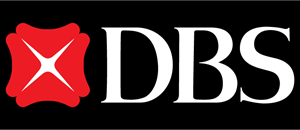

**Project Overview:**

This project aims to study the text analysis of DBS Bank performance feedback by labelling words in a set of reviews as nouns, adjectives, verb using PoS Tagging on a total of 107 consumer reviews from Jul 2019 to Nov 2023 extracted from:

 i. *Trustpilot* <br>
 ii. *BankQuality* <br>
```
Author: Aiman Hakimi (153153)
```


Suggestion: Best viewed on *Google Colab*.

##**Import Necesssary Libraries**

In [ ]:
%config Completer.use_jedi=False

import pandas as pd
import spacy
from nltk.tag import pos_tag

import re

import warnings
warnings.filterwarnings("ignore")

##**Load The Sample Dataset**

In [ ]:
dbs_pos_rev = pd.read_csv("dbs_pos_reviews.csv", na_values="?")
dbs_neg_rev = pd.read_csv("dbs_neg_reviews.csv", na_values="?")

##**Data Pre-processing**

In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

"""
Helper function to remove punctuation, lowercase conversion,
and removing unnecessary characters.
"""
def clean_reviews(Review):
  crev = str(Review).lower()
  crev = re.sub(r'[^\w\s]', '', crev)
  crev = re.sub(r'\s{2,}', ' ', crev)
  return crev

dbs_pos_rev["Cleaned_Review"] = dbs_pos_rev["Review"].apply(clean_reviews)
dbs_neg_rev["Cleaned_Review"] = dbs_neg_rev["Review"].apply(clean_reviews)

##**Part-of-Speech Tagging**

In [ ]:
# Helper function to perform PoS Tagging
def perform_pos_tagging(Review):
  doc = nlp(Review)
  pos_tags = [(token.text, token.pos_) for token in doc]
  return pos_tags

# Perform POS tagging
dbs_pos_rev["POS_Tags"] = dbs_pos_rev["Cleaned_Review"].apply(perform_pos_tagging)
dbs_neg_rev["POS_Tags"] = dbs_neg_rev["Cleaned_Review"].apply(perform_pos_tagging)

In [ ]:
# Print sample tagged reviews
print("Positive Reviews:")
print(dbs_pos_rev[["Review", "Cleaned_Review", "POS_Tags"]].head(10))

Positive Reviews:
                                              Review  \
0     Pretty good. Just ATM can be crowded at times.   
1  A great bank for us Singaporeans!! The smart p...   
2  I've been a customer for four years and have n...   
3  Moved to Singapore from the UK a couple of yea...   
4                              wow ...bhumi meri hai   
5  Called recently to organise a new loan, expect...   
6              Internet banking is best in the world   
7  Thank you for yr kind assistance .very service...   
8  Customer service adviser Yanty was very helpfu...   
9  Dear Head of DBS Bank, Westgate Branch,I, Hazl...   

                                      Cleaned_Review  \
0       pretty good just atm can be crowded at times   
1  a great bank for us singaporeans the smart pho...   
2  ive been a customer for four years and have no...   
3  moved to singapore from the uk a couple of yea...   
4                                 wow bhumi meri hai   
5  called recently to organis

In [ ]:
from collections import Counter

"""
Helper function to analyse the top 10 most frequent words
by POS tag in a set of POS-tagged reviews.
"""
def analyze_top_words_by_pos(pos_tagged_reviews):

    # Define a list of POS tags to track
    pos_tags_to_track = ["VERB", "ADJ", "NOUN"]

    # Create a dictionary to store tag counts
    tag_counts = {tag: Counter() for tag in pos_tags_to_track}

    # Iterate through all reviews and count POS occurrences
    for review_id, pos_tags in pos_tagged_reviews.items():
        for token, tag in pos_tags:
            if tag in tag_counts:
                tag_counts[tag][token] += 1

    # Extract top 10 words for each tag
    top_words_by_tag = {}
    for tag, tag_counter in tag_counts.items():
        top_words_by_tag[tag] = tag_counter.most_common(10)

    return top_words_by_tag

###Positive Reviews

In [ ]:
# Analyse positive reviews
pos_top_words_by_tag = analyze_top_words_by_pos(dbs_pos_rev["POS_Tags"])

# Print top 10 words for each POS tag
for sentiment, top_words in [("Positive", pos_top_words_by_tag)]:
    print(f"\nTop 10 words by POS tag in {sentiment} Reviews:")
    for tag, top_words in top_words.items():
        print(f"\n{tag}:")
        for word, count in top_words:
            print(f"\t{word}: {count}")


Top 10 words by POS tag in Positive Reviews:

VERB:
	have: 7
	advised: 6
	thank: 5
	made: 4
	did: 3
	had: 3
	go: 3
	called: 3
	assisted: 3
	do: 3

ADJ:
	new: 6
	good: 4
	best: 4
	online: 4
	great: 3
	able: 3
	multiplier: 2
	fast: 2
	happy: 2
	long: 2

NOUN:
	account: 12
	branch: 9
	service: 9
	bank: 8
	customer: 6
	years: 5
	card: 5
	call: 5
	dbs: 4
	days: 4


###Negative Reviews

In [ ]:
# Analyse negative reviews
neg_top_words_by_tag = analyze_top_words_by_pos(dbs_neg_rev["POS_Tags"])

# Print top 10 words for each POS tag
for sentiment, top_words in [("Negative", neg_top_words_by_tag)]:
    print(f"\nTop 10 words by POS tag in {sentiment} Reviews:")
    for tag, top_words in top_words.items():
        print(f"\n{tag}:")
        for word, count in top_words:
            print(f"\t{word}: {count}")


Top 10 words by POS tag in Negative Reviews:

VERB:
	have: 31
	get: 15
	called: 12
	had: 11
	open: 11
	go: 10
	do: 10
	dbs: 9
	said: 9
	is: 8

ADJ:
	other: 20
	worst: 17
	more: 11
	multiple: 11
	many: 10
	same: 9
	bad: 9
	terrible: 8
	poor: 8
	dbs: 8

NOUN:
	bank: 95
	customer: 50
	service: 49
	account: 41
	dbs: 32
	card: 29
	time: 21
	month: 15
	amount: 14
	money: 13
